> 4/26

#### updated `my_metrics` to print importances with labels, additional errors and include `max_depth` in f(`arguments`)
* the module/function scales: no need to do it before hand, but will to figure out what the 'importances' are. 
* module has two functions: 
    1. gs_svr (X, y, train_size)
    2. gs_rf (X, y, train_size, max_leaf_depth)

> 4/25
#### I was gonna do a basic linear regression but I spent too much time this afternoon troublesehooting a dumb error... and now that I've trained myself to `git pull upstream main` before starting significant work on the group project, I see $David$ has already done a thorough job so I'll be focusing on a random forests regression.

### got a random forest using the columns from David's `06_nb`
* got output,not sure how to read feature importances o
* what to do with residuals? 
* which other errors to check? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# transformer
from sklearn.model_selection import train_test_split

# scalers
from sklearn.preprocessing import StandardScaler

# regressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
# custom imports
import mymetrics as m                    # my module, single function open
plt.style.use('gstyle.mplstyle')         # stylesheet for sns

pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [4]:
path = '../processed_data/all_merged2.csv'
df = pd.read_csv(path)

df.shape

(25444, 62)

In [5]:
df.dropna(inplace=True)
df.shape

(14912, 62)

In [6]:
# X = X.fillna(X.median()) #fill with median value
# X = X1.dropna(inplace = True)
# X = X1.fillna(0)#
# X = df[['ozone']]

# X = 

# y = df['asthma']

In [7]:
# FROM DAVID'S 6_NB: 
# cutting out percentiles , lat/lon, zip, census tract, "scores"

initial_columns_to_fit =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']

In [8]:
# make a dataframe with just the initial_columns_to_fit, and all NaNs filled with median.
# amgd_cut = amgd[initial_columns_to_fit].fillna(amgd[initial_columns_to_fit].median())

y = df['asthma']
X = df[initial_columns_to_fit]

In [9]:
# dropping all health outcomes and strict counts in addition to percentiles 
X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population'
    ])
# X.head()

In [10]:
# # m.gs_rf( X, y, train size, max_leaf_depth)

# rf_results = m.gs_rf(X, y, 0.7, 10);
# rf_results

fitting svr model ... 
predicting all X ...  
determining feature importances ... 
calculating error metrics ... 
All Metrics Calculated. Done.  
plotting feature importances ... 


(0.2893096808355977,
   Metric         Value
 0     r2 -7.055843e+05
 1    rss  9.643677e+12
 2  max_e  2.166612e+06
 3   rmse  2.543041e+04
 4    mae  6.467058e+08
 5    mse  6.467058e+08,
                  Feature  Importances
 0                  ozone    -0.395736
 1                  pm2.5     0.804109
 2              diesel pm    -0.168497
 3             pesticides    -0.525782
 4                traffic    -0.482936
 5          cleanup sites     0.299325
 6    groundwater threats     0.952635
 7             haz. waste     0.332131
 8      imp. water bodies    -0.334039
 9            solid waste    -1.075584
 10      pollution burden     1.517295
 11             education     7.853893
 12  linguistic isolation    -7.252773
 13               poverty    11.332793
 14        drinking water    -1.971475
 15          tox. release    -2.570338
 16          unemployment     2.864189
 17        housing burden     0.272389
 18             est total     0.618712
 19               est gen     

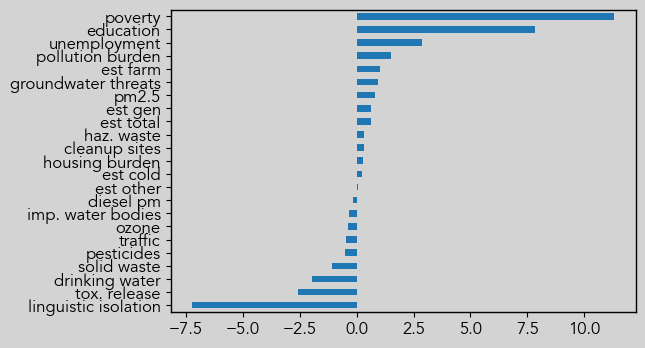

In [11]:
# m.gs_svr( X, y, train size)

# retunrsn R2 score, coefs. 
svr_results = m.gs_svr(X, y, 0.7)
svr_results 

> # we still havne't figured out what to do with ozone, but should be a simple transformation